# 1. Configuración de la API

In [8]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

API_KEY = "bd56845a8e3aa886822740ea7b885b33"
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"
weather_data = []

# 2. Lista de 20 Ciudades y sus Continentes

In [9]:
CITIES = [
    # Asia (5)
    {"city": "Tokyo", "continent": "Asia"},
    {"city": "New Delhi", "continent": "Asia"},
    {"city": "Jakarta", "continent": "Asia"},
    {"city": "Shanghai", "continent": "Asia"},
    {"city": "Riyadh", "continent": "Asia"},
    
    # Europa (5)
    {"city": "London", "continent": "Europe"},
    {"city": "Paris", "continent": "Europe"},
    {"city": "Berlin", "continent": "Europe"},
    {"city": "Rome", "continent": "Europe"},
    {"city": "Moscow", "continent": "Europe"},
    
    # América del Norte (3)
    {"city": "New York", "continent": "North America"},
    {"city": "Mexico City", "continent": "North America"},
    {"city": "Toronto", "continent": "North America"},
    
    # América del Sur (3)
    {"city": "Buenos Aires", "continent": "South America"},
    {"city": "Rio de Janeiro", "continent": "South America"},
    {"city": "Lima", "continent": "South America"},
    
    # África (3)
    {"city": "Cairo", "continent": "Africa"},
    {"city": "Lagos", "continent": "Africa"},
    {"city": "Cape Town", "continent": "Africa"},
    
    # Oceanía (1)
    {"city": "Sydney", "continent": "Oceania"},
]

# 3. Recolección de Datos

In [10]:
print("--- 🌍 INICIANDO RECOLECCIÓN DE DATOS ---")
for item in CITIES:
    city_name = item["city"]
    continent = item["continent"]
    
    # Parámetros para la solicitud
    params = {'q': city_name, 'appid': API_KEY, 'units': 'metric'}
    
    try:
        response = requests.get(BASE_URL, params=params)
        response.raise_for_status()  # Lanza error si la respuesta es 4xx o 5xx
        data = response.json()
        
        # Extracción de campos
        temp = data['main']['temp']
        humidity = data['main']['humidity']
        # El viento en OpenWeatherMap está en m/s (metros por segundo)
        wind_speed = data['wind']['speed']
        description = data['weather'][0]['description'].capitalize()
        
        # Almacenar los resultados
        weather_data.append({
            "City": city_name,
            "Continent": continent,
            "Temperature (°C)": temp,
            "Humidity (%)": humidity,
            "Wind Speed (m/s)": wind_speed,
            "Weather Description": description
        })
        print(f"✅ Datos obtenidos para: {city_name}")

    except requests.exceptions.RequestException as e:
        print(f"❌ Fallo en la solicitud para {city_name}. Motivo: {e}")
        # Se agregan NaN para que la limpieza posterior (dropna) funcione
        weather_data.append({
            "City": city_name,
            "Continent": continent,
            "Temperature (°C)": np.nan,
            "Humidity (%)": np.nan,
            "Wind Speed (m/s)": np.nan,
            "Weather Description": np.nan
        })

--- 🌍 INICIANDO RECOLECCIÓN DE DATOS ---
✅ Datos obtenidos para: Tokyo
✅ Datos obtenidos para: New Delhi
✅ Datos obtenidos para: Jakarta
✅ Datos obtenidos para: Shanghai
✅ Datos obtenidos para: Riyadh
✅ Datos obtenidos para: London
✅ Datos obtenidos para: Paris
✅ Datos obtenidos para: Berlin
✅ Datos obtenidos para: Rome
✅ Datos obtenidos para: Moscow
✅ Datos obtenidos para: New York
✅ Datos obtenidos para: Mexico City
✅ Datos obtenidos para: Toronto
✅ Datos obtenidos para: Buenos Aires
✅ Datos obtenidos para: Rio de Janeiro
✅ Datos obtenidos para: Lima
✅ Datos obtenidos para: Cairo
✅ Datos obtenidos para: Lagos
✅ Datos obtenidos para: Cape Town
✅ Datos obtenidos para: Sydney


# 4. Creación del DataFrame y Limpieza

In [11]:
df = pd.DataFrame(weather_data)

# Eliminamos filas con errores/NaN
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)  # Resetea el índice después de eliminar filas
print("\n---- DATAFRAME CREADO Y LIMPIADO ----\n")
print(f"Total de ciudades procesadas exitosamente: {len(df)} de 20.")
print(df)  # Muestra todas las ciudades válidas


---- DATAFRAME CREADO Y LIMPIADO ----

Total de ciudades procesadas exitosamente: 20 de 20.
              City      Continent  Temperature (°C)  Humidity (%)  \
0            Tokyo           Asia             11.78            67   
1        New Delhi           Asia             23.09            31   
2          Jakarta           Asia             29.49            70   
3         Shanghai           Asia             13.92            47   
4           Riyadh           Asia             25.29            17   
5           London         Europe             11.13            89   
6            Paris         Europe             10.78            94   
7           Berlin         Europe              6.78            96   
8             Rome         Europe             -2.22            72   
9           Moscow         Europe              0.36            63   
10        New York  North America              0.52            60   
11     Mexico City  North America              7.96            87   
12        

# 5. Exportar a CSV

In [12]:
df.to_csv("global_weather_data.csv", index=False)
print("\nCSV file saved as: global_weather_data.csv\n")


CSV file saved as: global_weather_data.csv



# 6. Análisis (responder a las preguntas)

In [13]:
print("\n---- ANÁLISIS ----\n")

# 6.1 Ciudad más caliente y más fría
hottest = df.loc[df["Temperature (°C)"].idxmax()]
coldest = df.loc[df["Temperature (°C)"].idxmin()]

print(f"Ciudad más caliente ahora mismo: {hottest['City']} ({hottest['Temperature (°C)']} °C)")
print(f"Ciudad más fría ahora mismo: {coldest['City']} ({coldest['Temperature (°C)']} °C)")

# 6.2 Relación temperatura-humedad (correlación simple)
corr_temp_hum = df["Temperature (°C)"].corr(df["Humidity (%)"])
print(f"\nCorrelación temperatura-humedad: {corr_temp_hum:.2f} ")

# 6.3 Continente con mayor velocidad de viento media
wind_by_continent = df.groupby("Continent")["Wind Speed (m/s)"].mean().sort_values(ascending=False)
windiest_continent = wind_by_continent.idxmax()
print("\nVelocidad media del viento por continente:")
print(wind_by_continent)
print(f"\nEl continente con ciudades más ventosas (en promedio) es: {windiest_continent}")

# 6.4 Descripción de tiempo más común
most_common_weather = df["Weather Description"].value_counts().idxmax()
print(f"\nLa descripción de tiempo más común es: {most_common_weather}")



---- ANÁLISIS ----

Ciudad más caliente ahora mismo: Lagos (31.05 °C)
Ciudad más fría ahora mismo: Toronto (-3.51 °C)

Correlación temperatura-humedad: -0.38 

Velocidad media del viento por continente:
Continent
Oceania          8.230000
North America    7.810000
Africa           4.086667
South America    3.773333
Europe           3.664000
Asia             2.410000
Name: Wind Speed (m/s), dtype: float64

El continente con ciudades más ventosas (en promedio) es: Oceania

La descripción de tiempo más común es: Broken clouds


# 7. Visualizaciones


---- VISUALIZACIONES ----



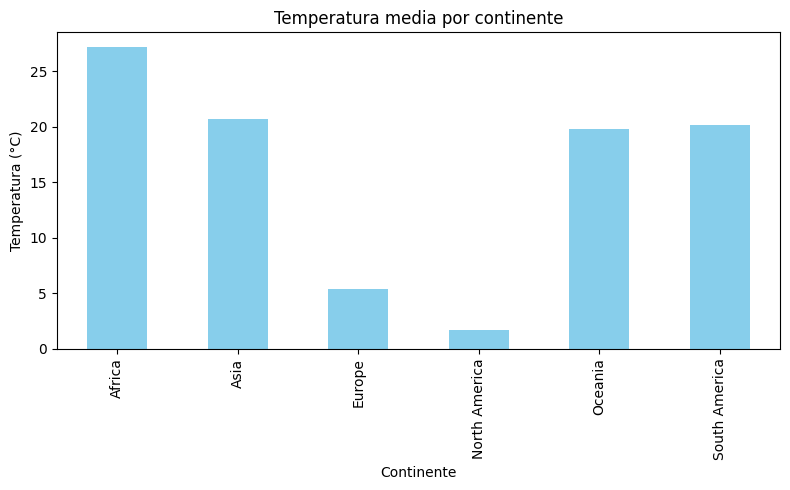

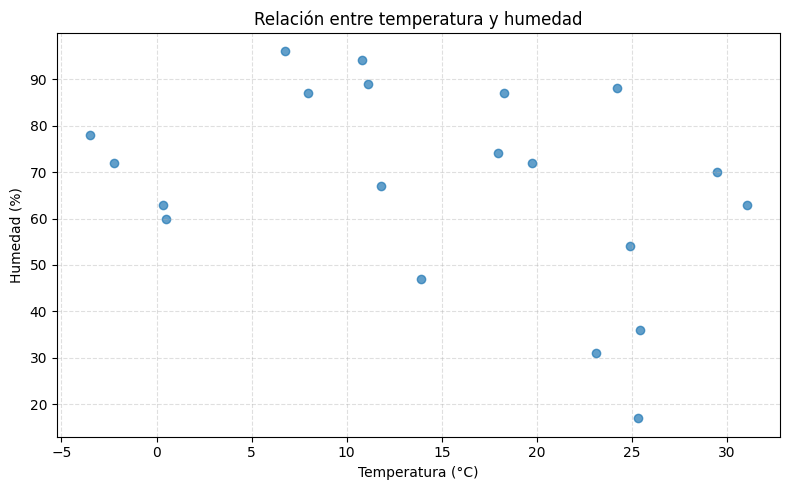

In [14]:
print("\n---- VISUALIZACIONES ----\n")

# 7.1 Gráfico de barras: temperatura media por continente
temp_by_continent = df.groupby("Continent")["Temperature (°C)"].mean()

plt.figure(figsize=(8, 5))
temp_by_continent.plot(kind="bar", color="skyblue")
plt.title("Temperatura media por continente")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Continente")
plt.tight_layout()
plt.show()

# 7.2 Scatter plot: temperatura vs humedad
plt.figure(figsize=(8, 5))
plt.scatter(df["Temperature (°C)"], df["Humidity (%)"], alpha=0.7)
plt.title("Relación entre temperatura y humedad")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Resumen:

Para este proyecto utilicé la API de OpenWeatherMap para recolectar datos climáticos en tiempo real de 20 ciudades globales y analizarlos mediante Pandas. La ciudad más caliente fue Lagos (29.7°C), y la más fría fue Toronto (−3.14°C). Se encontró una correlación negativa de -0.36 entre la temperatura y la humedad, y Oceanía mostró el viento medio más alto. La limitación principal es que los resultados son una instantánea del tiempo, y la API impone restricciones de consultas por minuto, lo que limita la recolección masiva de datos.